In [1]:
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# my_directory=""

In [2]:
os.chdir(my_directory)

# Cultuurconnect libraries

In this notebook, we take a look at the size of the libraries in the dataset.

## Importing data

In [5]:
con = sqlite3.connect("cultuurconnect.db")

In [6]:
libraries = pd.read_sql("""
                SELECT library_list, COUNT(DISTINCT(w.work_id)) library_size
                FROM holding h
                JOIN
                works_frabl w ON w.frabl=h.frabl
                GROUP BY library_list""",
                   con)

In [7]:
libraries = libraries.sort_values(by="library_size", ascending=False).copy()

In [8]:
libraries.head(20)

,library_list,library_size
492,Hasselt Dusart,5492
107,Bibliotheek De Krook,3991
500,Het Predikheren bibliotheek Mechelen,2259
504,Hoofdbibliotheek Biekorf,2174
533,Muntpunt,1909
148,Bibliotheek Genk,1778
284,Bibliotheek Permeke (Antwerpen),1707
635,de Bib Leuven Tweebronnen,1545
181,Bibliotheek Ieper,1519
39,Bib Sint-Niklaas,1514


In [9]:
libraries.shape

(639, 2)

## Visualize

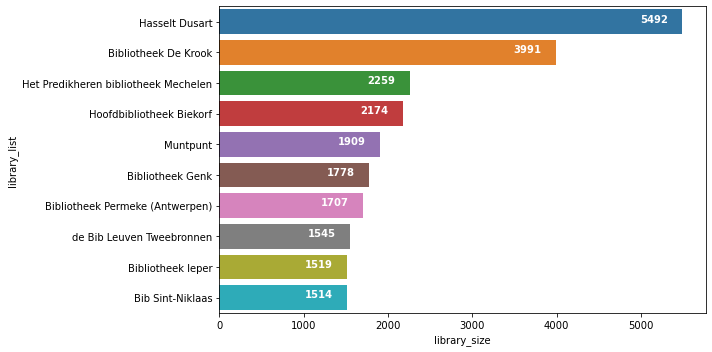

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=libraries.head(10),
            x="library_size",
            y="library_list",
            ax=ax)

for i,v in enumerate(libraries.library_size.head(10)):
    ax.text(v-500,i, str(round(v,2)), color="white", fontweight="bold")

plt.tight_layout()

plt.savefig("plots/cultuurconnect_libraries.png")

In [49]:
import numpy as np

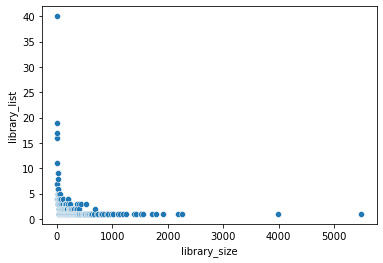

In [23]:
fig, ax = plt.subplots()

sns.scatterplot(data = libraries.groupby("library_size").library_list.count().reset_index(),
               x = "library_size",
               y = "library_list",
               ax=ax)

plt.savefig("plots/cultuurconnect_libraries_sizefreq.png")

Most libraries only hold a few of the records, while some hold very many. Hasselt Dusart is the library with the highest number of records. The library also houses the collection of the PXL Hogeschool, which is a school of higher education. It could be argued that this library is best removed from the analysis of public libraries because of this reason. Note that this reduces the comprehensiveness of the Cultuurconnect catalogue quite a lot and that the main provincial libraries always have more books anyway (e.g. De Krook). 